<a href="https://colab.research.google.com/github/Meitiann/INF2008-ML-Labs/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week2 Lab: Practice lab, no submission
I left a few questions, please try to figure out

## Feature Scaling

The lectures discussed three different techniques:
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
- Z-score normalization which we will explore below.

### z-score normalization
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{n}_j = \dfrac{x^{n}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{N} \sum_{n=0}^{N-1} x^{n}_j \tag{5}\\
\sigma^2_j &= \frac{1}{N} \sum_{n=0}^{N-1} (x^{n}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

In [ ]:
# download data
!gdown 1FtEQNZcfT7AKOTmAdpConF16r5l7TiPo

Downloading...
From: https://drive.google.com/uc?id=1FtEQNZcfT7AKOTmAdpConF16r5l7TiPo
To: /content/houses.txt
100% 12.5k/12.5k [00:00<00:00, 32.2MB/s]


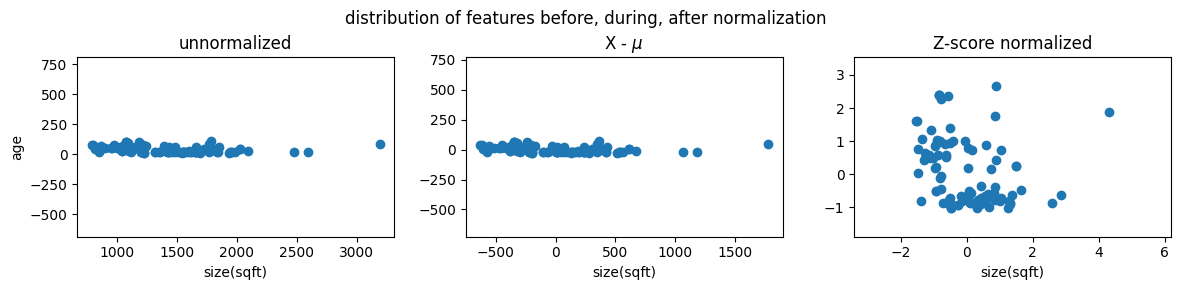

In [ ]:
data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]

X_features = ['size(sqft)','bedrooms','floors','age']

mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

### TODO: Implemment Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $

In [ ]:
#TODO

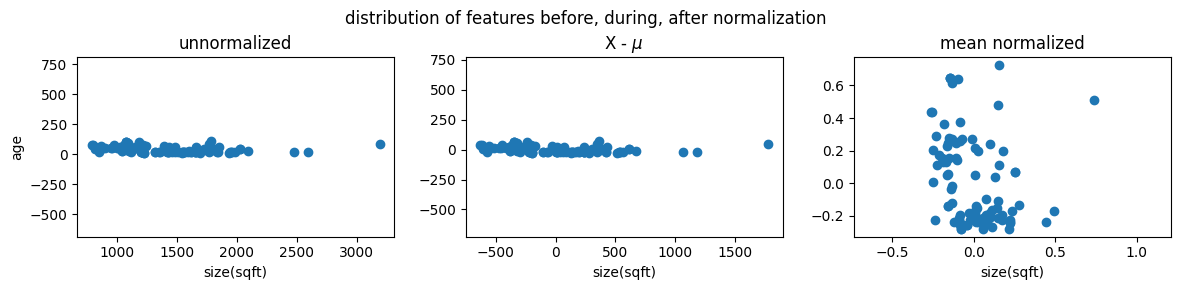

In [ ]:
# @title 👀 Solution
mu = np.mean(X_train,axis=0)
max_value = np.max(X_train, axis=0)
min_value = np.min(X_train, axis=0)

X_mean = (X_train - mu)
X_norm = (X_train - mu)/(max_value-min_value)

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"mean normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

## Sigmoid or Logistic Function
- We would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1.

Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $N$ values, one for each example.
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).

It also works with a single number as an input, as shown below.

In [ ]:
# Input is an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.718  7.389 20.086]
Input to exp: 1
Output of exp: 2.718281828459045


Implement the `sigmoid` function in python

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    #TODO

    return g

In [ ]:
# @title 👀 Solution
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

Let's see what the output of this function is for various value of `z`

In [ ]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


The values in the left column are `z`, and the values in the right column are `sigmoid(z)`. As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1.

Now, let's try to plot this function using the `matplotlib` library.

Text(0.5, 0, 'z')

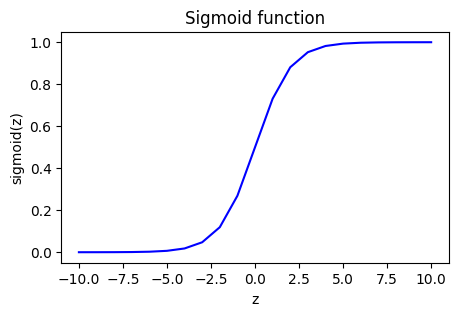

In [ ]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

## Binary Classification with Logistic Regression using sklearn

In [ ]:
# importing required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

We load the famous breast cancer dataset from sklearn. The aim is to predict whether a patient has breast cancer from several measurements so this is a binary classification problem.

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
print(X,y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
# Split the data into training and testing sets
# Question: test_size=0.2, what does this mean?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### In this part, you can compare the results using either non-normalized (raw) feature or normalized feature

###### use the non-normalized features X_train, X_test

In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data, to test the model
y_pred = model.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
# Question: what is precision, recall f1-score -> will learn in the next lecture
classification_report = classification_report(y_test,y_pred)
print(f'accuracy score: {accuracy}')
print(f'classifcation report : \n  {classification_report}')


accuracy score: 0.956140350877193
classifcation report : 
                precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### use the normalized features X_train_scaled, *X_test_scaled*

In [ ]:
# # Standardize the numerical features
# scaler = StandardScaler()
# # Question: which type of feature scaling?
# X_train_scaled = scaler.fit_transform(X_train)
# # Question: what is the difference of fit_transform and transform?
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# # Create a logistic regression model
# model = LogisticRegression()

# # Fit the model to the training data
# model.fit(X_train_scaled, y_train)

# # Make predictions on the test data, to test the model
# y_pred = model.predict(X_test_scaled)

# # Evaluate the model

# accuracy = accuracy_score(y_test, y_pred)
# # Question: what is precision, recall f1-score -> will learn in the next lecture
# classification_report = classification_report(y_test,y_pred)
# print(f'accuracy score: {accuracy}')
# print(f'classifcation report : \n  {classification_report}')


*Use the normalized feature can get better results!*

## Binary Classification with Logistic Regression using PyTorch
You can refer to the following tutorial for help: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

In general, when working with PyTorch there are 4 steps to the training pipeline.

- Preprare the data (convert to tensors, reshape etc)
- Construct the model (usually as a class)
- Define the loss and optimiser
- Write a training loop
This time, we will practice these steps on a logistic regression problem.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

#### 1. Preprare the data and concert tensor
We use the same breast cancer dataset from sklearn

In [ ]:
# Load data
data = datasets.load_breast_cancer()
X, y = data.data, data.target
print('X shape:',X.shape)
print('y shape:',y.shape)

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale data (mean=0, std=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

X shape: (569, 30)
y shape: (569,)


In [ ]:
# Reshape tensors
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: torch.Size([455, 1])
y_test shape: torch.Size([114, 1])


#### 2. Construct the model
When working with neural networks, we need to inherit the 'nn.Module' and define a 'forward' attribute.

The inheritance part is done to get access to attributes like 'model.parameters()', which are used in training.

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, n_feats):
        super().__init__()

        # Define layers
        self.lin = # TODO: define a layer n_feats to 1 (the output is 1)
        self.sig = # TODO: define sigmoid function

    def forward(self, x):
        return self.sig(self.lin(x))


In [ ]:
# @title 👀 Solution
# Model
class LogisticRegression(nn.Module):
    def __init__(self, n_feats):
        super().__init__()

        # Define layers
        self.lin = nn.Linear(n_feats,1)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        return self.sig(self.lin(x))

model = LogisticRegression(n_feats = X.shape[1])

#### 3. Define the loss and optimiser
The loss function is called from the 'torch.nn' library and the optimiser from the 'torch.optim' library.

In [ ]:
# Binary cross entropy loss
loss = #TODO BCE loss

# SGD optimiser
optimiser = #TODO SGD optimizer

In [ ]:
# @title 👀 Solution
# Binary cross entropy loss
loss = nn.BCELoss()

# SGD optimiser
optimiser = torch.optim.SGD(params = model.parameters(), lr=0.01)

#### 4. Write a training loop
The most important thing to remember with PyTorch is that after every epoch, you have to zero the gradients (otherwise they will accumulate and explode).

In [ ]:
n_iters = 1000

# Loop
for epoch in range(n_iters):
    # Forward pass
    y_preds = model(X_train)
    L = loss(y_preds, y_train)

    # Backprop
    L.backward()

    # Update parameters
    optimiser.step()

    # Zero gradients
    optimiser.zero_grad()

    # Print loss
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {L.item():.3f}')

    #TODO: can you please plot the learning curve?


Epoch 0, loss 0.602
Epoch 100, loss 0.249
Epoch 200, loss 0.188
Epoch 300, loss 0.160
Epoch 400, loss 0.143
Epoch 500, loss 0.132
Epoch 600, loss 0.124
Epoch 700, loss 0.117
Epoch 800, loss 0.112
Epoch 900, loss 0.108



#### Evaluate
Finally, we calculate the accuracy on the test set.

In [ ]:
# Turn gradient tracking off
with torch.no_grad():
    acc = model(X_test).round().eq(y_test).sum() / len(y_test.numpy())
    print(f'Accuracy on test set: {100*acc.item():.2f} %')

Accuracy on test set: 94.74 %
